In [1]:
# 引用库
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import matplotlib.figure
import sys
sys.path.append("..") # 指向父文件夹
import util

util.CHINESE_FONT_FAMILY = "Microsoft YaHei" # 如果没有微软雅黑，在这修改字体
# 增加扩展方法
matplotlib.axes.Axes.draw_vector = util.axes_draw_vector # 增加画vector扩展方法
# 增加中文显示的扩展方法
matplotlib.axes.Axes.ch_title = util.axes_ch_title
matplotlib.figure.Figure.ch_title = util.figure_ch_title

plt.rcdefaults() # 能放大图片，不知道原理

# 线性变换 Linear Transformation

`线性变换`：

- 线性：网格线**保持平行**且**等距分布**，原点不变
- 变换：function，而且 是一种 movement
    - 把一个向量，变成另一个

通过改变`基向量`，从而改变原来的向量

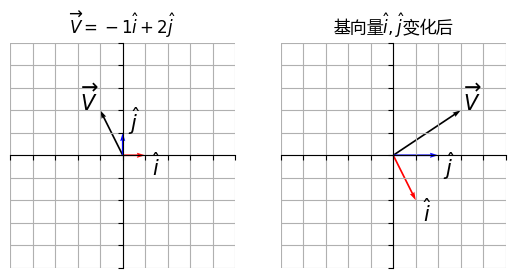

In [2]:
i = np.array((1,0))
j = np.array((0,1))

v = -1 * i + 2 * j

ax_left = plt.subplot(121)
ax_left.draw_vector(v,"V") # 画出向量
ax_left.draw_vector(i,"i", color='r')
ax_left.draw_vector(j,"j", color='b')
ax_left.set_title("$\overrightarrow V = -1 \hat i + 2 \hat j$")

ax_right = plt.subplot(122)

i = np.array((1,-2))
j = np.array((2,0))

v = -1 * i + 2 * j # 注意：这里的公式没有变，只是改变了 两个基向量

ax_right.draw_vector(v,"V") # 画出向量
ax_right.draw_vector(i,"i", color='r')
ax_right.draw_vector(j,"j", color='b')
ax_right.ch_title("基向量$\hat i,\hat j$变化后")

就不需要了解变换的过程，通过，变换后的两个基向量，你也能推算出最后的结果：

$$
\overrightarrow V = -1 \hat i + 2 \hat j
$$

$$
\hat i = \begin{bmatrix} 1\\ 0 \end{bmatrix}, \hat j = \begin{bmatrix} 0\\ 1 \end{bmatrix} \rightarrow
    \overrightarrow V = 
        \begin{bmatrix} -1\times 1+ 2\times 0\\ 
            -1\times 0+ 2\times 1 \end{bmatrix} =
        \begin{bmatrix} -1\\ 2 \end{bmatrix}
$$

$$
\hat i = \begin{bmatrix} 1\\ -2 \end{bmatrix}, \hat j = \begin{bmatrix} 2\\ 0 \end{bmatrix} \rightarrow
    \overrightarrow V = 
        \begin{bmatrix} -1\times 1+ 2\times 2\\ 
            -1\times -2+ 2\times 0 \end{bmatrix} =
        \begin{bmatrix} 3\\ 2 \end{bmatrix}
$$

即：

$$
\hat i = \begin{bmatrix} x_i\\ y_i \end{bmatrix},
\hat j = \begin{bmatrix} x_j\\ y_j \end{bmatrix},

\overrightarrow V = 
    \begin{bmatrix}
        -1 x_i + 2 x_j\\ 
        -1 y_i + 2 y_j
    \end{bmatrix}
$$

通过 $\hat i, \hat j$ 这两个基向量，一共四个数字，就可以确定 二维线性变换后的位置。

## 矩阵 Matrix

把这两个基向量放到一个矩阵（Matrix）中，就是$\begin{bmatrix} x_i\ \ x_j\\ y_i\ \ y_j \end{bmatrix}$，它记录了一次`线性变换`

我们使用abcd的`矩阵`,代替xy，即$\begin{bmatrix} a\ \ b\\ c\ \ d \end{bmatrix}$

再使用`矩阵`，与`向量`相乘，即

$$
\begin{bmatrix}
    a & b\\
    c & d 
\end{bmatrix}

\begin{bmatrix} x\\ y \end{bmatrix}  =
\begin{bmatrix}
    ax\ +\ by\\ 
    cx\ +\ dy
\end{bmatrix}
$$

## 使用NumPy 表示 矩阵 * 向量

NOTE:
- numpy 的矩阵乘法为：`.dot()`
- 将基向量放到矩阵中就要“竖着放了”：x放一起，y放一起

例子：

In [3]:
i = np.array((1,0))
j = np.array((0,1))

v = -1 * i + 2 * j
v

array([-1,  2])

In [4]:
# 将 基向量放入矩阵中，这里一定要注意了，x放一起
m = np.array([[0, -1],
              [1, 0]])
m

array([[ 0, -1],
       [ 1,  0]])

In [5]:
np.dot(m, v) # 矩阵 * 向量

array([-2, -1])

In [6]:
# 使用 改变基向量的方法 验证
i = np.array((0,1))
j = np.array((-1,0))

v = -1 * i + 2 * j
v

array([-2, -1])

## 矩阵乘法

可以这样理解：`矩阵`记录了一次线性变换
- 线性变换是`基向量`的变化
- `矩阵`记录了基向量变化后的位置

矩阵的乘积，就是进行多次的线性变换

方向：从右到左

### 例子：先逆时针旋转，再剪切

剪切：可以理解为（$\hat i$不变，$\hat j$变到(1,1)）？

先展示一下这两个变换

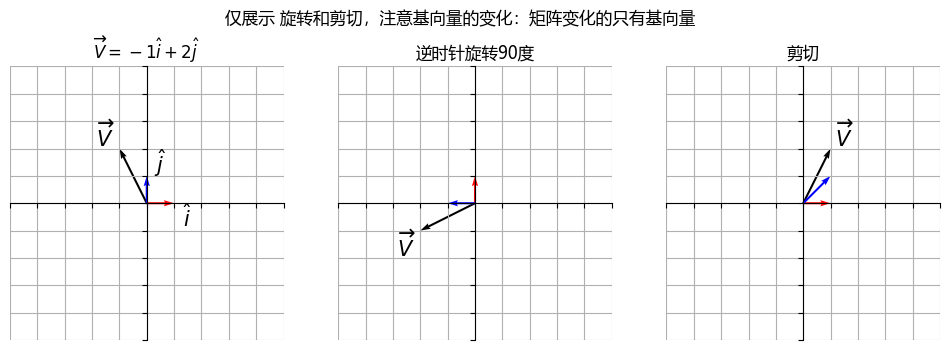

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

ax_left = axs[0] # 最左边的绘图区
i = np.array((1,0))
j = np.array((0,1))
v = -1 * i + 2 * j

ax_left.draw_vector(v,"V") # 画出向量
ax_left.draw_vector(i,"i", color='r')
ax_left.draw_vector(j,"j", color='b')
ax_left.set_title("$\overrightarrow V = -1 \hat i + 2 \hat j$")


ax_middle = axs[1] # 中间的绘图区
i = np.array((0,1)) # 逆时针旋转90度
j = np.array((-1,0))
v = -1 * i + 2 * j 

ax_middle.draw_vector(v,"V") # 画出向量
ax_middle.draw_vector(i, color='r')
ax_middle.draw_vector(j, color='b')
ax_middle.ch_title("逆时针旋转90度")

ax_right = axs[2] # 右侧绘图区
i = np.array((1,0)) # 剪切 shear
j = np.array((1,1))

v = -1 * i + 2 * j # 注意：这里的公式没有变，只是改变了 两个基向量

ax_right.draw_vector(v,"V") # 画出向量
ax_right.draw_vector(i, color='r')
ax_right.draw_vector(j, color='b')
ax_right.ch_title("剪切")

fig.ch_title("仅展示 旋转和剪切，注意基向量的变化：矩阵变化的只有基向量")

#### 旋转再剪切

这里要注意了，第三次的基向量，是通过 `剪切矩阵 * 第二次的基向量` 得到的。

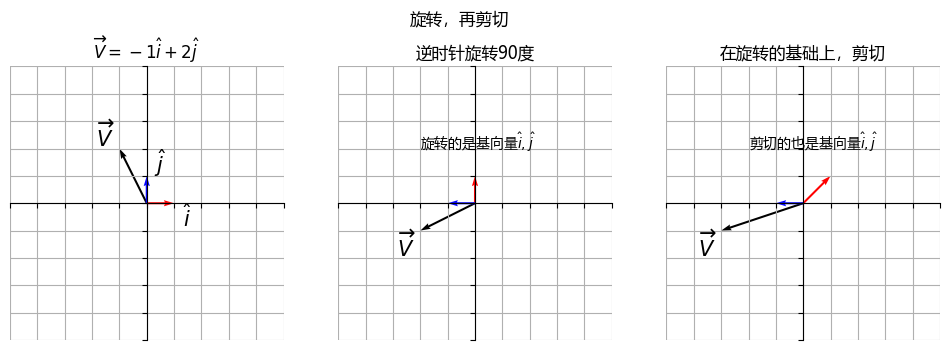

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

ax_left = axs[0] # 最左边的绘图区
i = np.array((1,0))
j = np.array((0,1))
v = -1 * i + 2 * j

ax_left.draw_vector(v,"V") # 画出向量
ax_left.draw_vector(i,"i", color='r')
ax_left.draw_vector(j,"j", color='b')
ax_left.set_title("$\overrightarrow V = -1 \hat i + 2 \hat j$")


ax_middle = axs[1] # 中间的绘图区
i = np.array((0,1)) # 逆时针旋转90度
j = np.array((-1,0))
v = -1 * i + 2 * j 

ax_middle.draw_vector(v,"V") # 画出向量
ax_middle.draw_vector(i, color='r')
ax_middle.draw_vector(j, color='b')
ax_middle.ch_title("逆时针旋转90度")
ax_middle.annotate("旋转的是基向量$\hat i,\hat j$", (-2,2), fontfamily=util.CHINESE_FONT_FAMILY)

ax_right = axs[2] # 右侧绘图区
matrix_shear = np.array([[1,1],[0,1]]) # 利用剪切矩阵，计算最后一次的基向量
i = np.dot(matrix_shear, i)
j = np.dot(matrix_shear, j)

v = -1 * i + 2 * j

ax_right.draw_vector(v,"V") # 画出向量
ax_right.draw_vector(i, color='r')
ax_right.draw_vector(j, color='b')
ax_right.ch_title("在旋转的基础上，剪切")
ax_right.annotate("剪切的也是基向量$\hat i,\hat j$", (-2,2), fontfamily=util.CHINESE_FONT_FAMILY)

fig.ch_title("旋转，再剪切")

### 注意理解矩阵变换的含义

矩阵变换：根本上变换的是两个基向量

- 再剪切，剪的是 第二次的两个`基向量`，而不是 把$\hat j$ 向 $\hat i$ 指向的方向水平移动
- 如果仅仅把剪切理解为移动 $\hat j$ 那就错了

这里真的很容易混淆，一定要注意了！

In [9]:
# 理解第一次的旋转
matrix_rotate = np.array([[0,-1], [1,0]]) # 旋转矩阵
i = np.array((1,0))
j = np.array((0,1))

# 做旋转变换
i = np.dot(matrix_rotate, i)
j = np.dot(matrix_rotate, j)

print("旋转后：i=[{} {}], j=[{} {}]".format(i[0], i[1], j[0], j[1]))
# 就是第二次的两个 基向量

旋转后：i=[0 1], j=[-1 0]


### 理解矩阵乘法

通过之前的知识，用矩阵表示这两次变换：

- 旋转矩阵：$\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$
- 剪切矩阵：$\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$


矩阵是从右到左的，那么上面的过程用矩阵就可以表示为：
$
\underset{shear}{ \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} }
\underset{rotate}{ \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} }
\underset{\overrightarrow V}{ \begin{bmatrix} -1 \\ 2 \end{bmatrix} }
$

其实也可以一部到位：直接从第一个图，到第三个图：

- 通过第三个图的两个基向量，就可以知道 表示这次变换的矩阵为： $\begin{bmatrix}  1 & -1 \\ 1 & 0  \end{bmatrix}$
- 所以 剪切矩阵 * 旋转矩阵 的结果就为 图一直接到图三的矩阵：

$$
\underset{shear}{ \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} }
\underset{rotate}{ \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} }
= \underset{1\rightarrow 3\ Matrix}{ \begin{bmatrix}  1 & -1 \\ 1 & 0  \end{bmatrix} }
$$

### 解析矩阵乘法是如何运算的

个人理解：多次的线性变换，最终都可表示为一次线性变换。矩阵的乘法，就是把多次线性变换 变成一个矩阵

$$
\underset{shear}{ \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} }
\underset{\hat i\ \ \ \ \ \ \ \ \ \hat j\\rotate}{ \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} }
$$

矩阵可以理解为 记录了几个基向量， 施加变化也是在基向量上，所以我们把两个基向量分开计算

1. 变化后的 $\hat i = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
= \begin{bmatrix}  1\times 0 + 1\times 1 \\ 0\times 0 + 1\times 1  \end{bmatrix} = \begin{bmatrix} 1\\1 \end{bmatrix}$
2. 同理，变化后的 $\hat j = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} -1 \\ 0 \end{bmatrix}
= \begin{bmatrix}  1\times -1 + 1\times 0 \\ 0\times -1 + 1\times 0 \end{bmatrix} = \begin{bmatrix} -1\\0 \end{bmatrix} $
3. 把$\hat i,\hat j$放到一个矩阵内 $\begin{bmatrix}  1 & -1 \\ 1 & 0  \end{bmatrix}$

#### 用纯符号表示

1. 使用符号表示两个矩阵，就是：
    $ \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} e & f \\ g & h \end{bmatrix} $
2. 变化后的 $ \hat i = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} e \\ f \end{bmatrix} 
    = \begin{bmatrix} a e + b g \\ c e + d g \end{bmatrix} $
3. 同理，变化后的 $ \hat j = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} f \\ h \end{bmatrix}
    = \begin{bmatrix}  a f + b h \\  c f + d h \end{bmatrix} $
4. 把$\hat i,\hat j$放到一个矩阵内 $\begin{bmatrix}  a e + b g & a f + b h \\ c e + d g & c f + d h \end{bmatrix}$

## 矩阵乘法的性质

1. 不满足交换律
2. 满足结合律

### 矩阵没有交换律(commutativity)

还是以 剪切矩阵$\begin{bmatrix}  1 & 1 \\ 0 & 1  \end{bmatrix}$ 与 旋转矩阵$\begin{bmatrix}  0 & -1 \\ 1 & 0  \end{bmatrix}$ 为例子

这次先剪切，再旋转$\begin{bmatrix}  0 & -1 \\ 1 & 0  \end{bmatrix} \begin{bmatrix}  1 & 1 \\ 0 & 1  \end{bmatrix}$

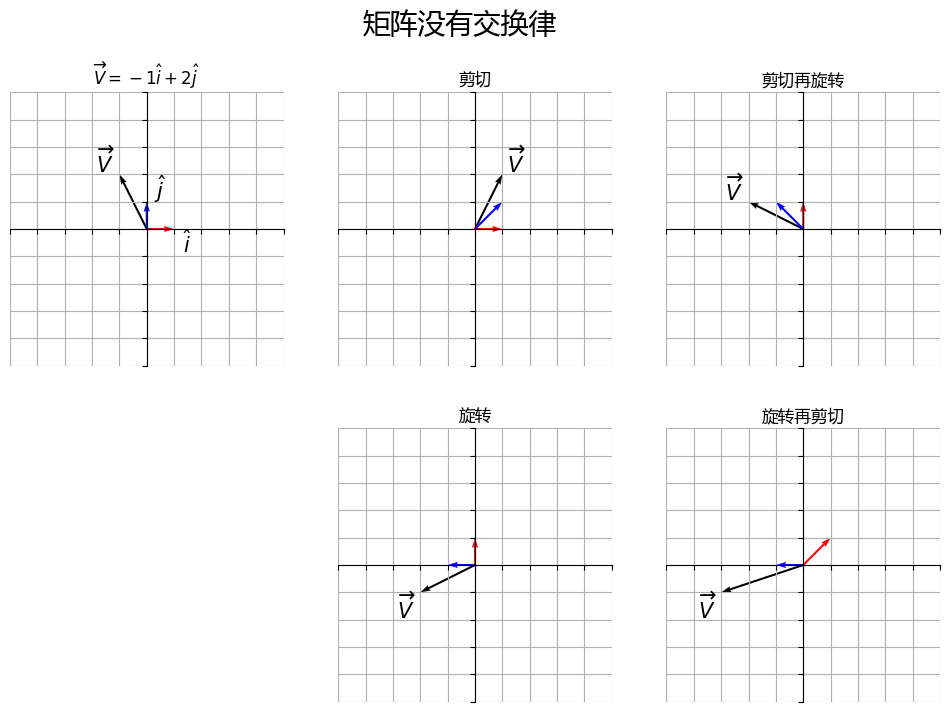

In [10]:
matrix_rotate = np.array([[0,-1], [1,0]]) # 旋转矩阵
matrix_shear = np.array([[1,1],[0,1]]) # 剪切矩阵
fig, axs = plt.subplots(2, 3, figsize=(12,8))
# 左上
i = np.array((1,0))
j = np.array((0,1))
v = -1 * i + 2 * j
axs[0,0].draw_vector(v,"V") # 画出向量
axs[0,0].draw_vector(i,"i", color='r')
axs[0,0].draw_vector(j,"j", color='b')
axs[0,0].set_title("$\overrightarrow V = -1 \hat i + 2 \hat j$")

# 中上： 剪切
i = np.dot(matrix_shear, i)
j = np.dot(matrix_shear, j)
v = np.dot(matrix_shear, v)

axs[0,1].draw_vector(v,"V") # 画出向量
axs[0,1].draw_vector(i, color='r')
axs[0,1].draw_vector(j, color='b')
axs[0,1].ch_title("剪切")

# 右上： 剪切再旋转
i = np.dot(matrix_rotate, i)
j = np.dot(matrix_rotate, j)
v = np.dot(matrix_rotate, v)

axs[0,2].draw_vector(v,"V") # 画出向量
axs[0,2].draw_vector(i, color='r')
axs[0,2].draw_vector(j, color='b')
axs[0,2].ch_title("剪切再旋转")

axs[1,0].set_axis_off() # 去除 左下的图

# 重置 i,j,v
i = np.array((1,0))
j = np.array((0,1))
v = -1 * i + 2 * j

# 中下： 旋转
i = np.dot(matrix_rotate, i)
j = np.dot(matrix_rotate, j)
v = np.dot(matrix_rotate, v)

axs[1,1].draw_vector(v,"V") # 画出向量
axs[1,1].draw_vector(i, color='r')
axs[1,1].draw_vector(j, color='b')
axs[1,1].ch_title("旋转")

# 右下： 旋转再剪切
i = np.dot(matrix_shear, i)
j = np.dot(matrix_shear, j)
v = np.dot(matrix_shear, v)

axs[1,2].draw_vector(v,"V") # 画出向量
axs[1,2].draw_vector(i, color='r')
axs[1,2].draw_vector(j, color='b')
axs[1,2].ch_title("旋转再剪切")

fig.ch_title("矩阵没有交换律", 20)

### 矩阵乘法的结合律 (associativity)

矩阵的乘法，就是从右到左地进行线性变换，所以，无论怎么算，都是可以的

例子：
- A(BC) 是先 进行C变化，再B，再A
- (AB)C 也是先 进行C变化，再B，再A


In [11]:
m1 = np.random.randint(0, 10,(3,3))
m1

array([[1, 7, 2],
       [4, 9, 0],
       [6, 1, 6]])

In [12]:
m2 = np.random.randint(0, 10,(3,3))
m2

array([[0, 2, 7],
       [9, 0, 8],
       [6, 1, 0]])

In [13]:
m3 = np.random.randint(0, 10,(3,3))
m3

array([[0, 9, 8],
       [7, 6, 5],
       [2, 0, 5]])

$M_1 (M_2 M_3)$

In [14]:
mt = np.dot(m2, m3)
mr1 = np.dot(m1, mt)
mr1

array([[ 154,  699,  935],
       [ 256,  777, 1188],
       [ 226,  513,  700]])

$(M_1 M_2) M_3$

In [15]:
mt = np.dot(m1, m2)
mr2 = np.dot(mt, m3)
mr2

array([[ 154,  699,  935],
       [ 256,  777, 1188],
       [ 226,  513,  700]])

In [16]:
mr1 == mr2

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])